# Crossfit Open / Games

With a budding interesting in data analysis/science work. Then about a 8 year hiatus, recently rediscovered crossift at a local box. Thought it would be interesting to look at the works and athletics. 

Additionaly create a model that can predict if an athlete can make using the provided datasets.

All anaysis and modeling will be done with python and tensorflow.

**Datasets**
https://www.kaggle.com/datasets/jeanmidev/crossfit-games?select=2019_opens_scores.csv


**Additional information**

Crossfit 2019 Open Standards - https://games.crossfit.com/workouts/open/2019
Crossfit 2020 Open Standards - https://games.crossfit.com/workouts/open/2020

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

2.10.0


### Import the Datasets

Import of the crossfit dataset from 
https://www.kaggle.com/datasets/jeanmidev/crossfit-games?select=2019_opens_scores.csv

In [4]:
open_scores = pd.read_csv('archive/2020_opens_scores.csv')
open_athletes = pd.read_csv('archive/2020_opens_athletes.csv')

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_7922/2235916083.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  open_athletes = pd.read_csv('archive/2020_opens_athletes.csv')


Reviewing the head of open scores dataset

In [5]:
open_athletes.head()

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,9184,Janet Black,Janet,Black,NaN,F,2886e-P9184_12-184.jpg,US,United States,4,16766,CrossFit Trison,46,1.63,66.68,1,29,0,Women (45-49)
1,12348,Karen McCadam,Karen,McCadam,NaN,F,74335-P12348_6-184.jpg,US,United States,4,17779,CrossFit Viento,45,1.68,66.68,2,33,0,Women (45-49)
2,288661,Christine Tensley,Christine,Tensley,NaN,F,cb7b3-P288661_1-184.jpg,US,United States,4,1483,Flower City CrossFit,45,1.65,64.41,3,48,0,Women (45-49)
3,37629,Heather Wood,Heather,Wood,NaN,F,7b3f4-P37629_3-184.jpg,CA,Canada,4,3240,CrossFit Quispamsis,45,1.57,57.61,4,50,0,Women (45-49)
4,50423,Jennifer Dieter,Jennifer,Dieter,NaN,F,5ceb5-P50423_10-184.jpg,US,United States,4,9506,Crucible CrossFit,46,1.57,61.23,5,53,0,Women (45-49)


Reviewing the head of the 2019 athletes dataset

In [6]:
open_scores.head(10)

,affiliate,breakdown,competitorid,division,is_scaled,judge,ordinal,rank,scaled,score,scoredisplay,scoreidentifier,time
0,CrossFit Sunninghill,10 rounds,120333,Men (35-39),0,Richard Smith,1,12,0,11800316,9:44,04faacabaa22dbaecf0d,584.0
1,CrossFit Sunninghill,27 rounds +\n3 thrusters\n,120333,Men (35-39),0,Richard Smith,2,2,0,1009210000,921 reps,29b2a385245a6cb5ae6f,NaN
2,CrossFit Sunninghill,165 reps,120333,Men (35-39),0,Richard Smith,3,9,0,1001650034,8:26,511ec1cf441b5ac48947,506.0
3,CrossFit Sunninghill,240 reps,120333,Men (35-39),0,Richard Smith,4,1,0,1002400162,17:18,3ba8f44249d3d8afe545,1038.0
4,CrossFit Sunninghill,240 reps,120333,Men (35-39),0,Richard Smith,5,1,0,1002400562,10:38,9de1c00eeda10ff3f39f,638.0
5,CrossFit 061,10 rounds,5312,Men (35-39),0,Harold Johnson,1,6,0,11800335,9:25,2459add6af818ef88812,565.0
6,CrossFit 061,25 rounds +\n4 thrusters\n4 toes-to-bars\n,5312,Men (35-39),0,Dave Ruiz,2,27,0,1008580000,858 reps,450d40d71c8f2a4afdd4,NaN
7,CrossFit 061,165 reps,5312,Men (35-39),0,Carole Turnbo,3,11,0,1001650024,8:36,0f94bf911e0eabce0494,516.0
8,CrossFit 061,240 reps,5312,Men (35-39),0,Kevin Jones,4,3,0,1002400138,17:42,bf8e8b74f5143c856599,1062.0
9,CrossFit 061,240 reps,5312,Men (35-39),0,Kevin Jones,5,17,0,1002400468,12:12,46ebf3b2153b0fceff7f,732.0


### Analytic dataset preview/review
List of information about the athlete and score

Review of the athletes dataset
- competitorid: used in the open dataset to link the athletes to the workout
- height: measured in meters
- height: measured in KGs
- postcompstatus: need additional information what this column is

Quick review of the open score dataset
- breakdown: description of number of rounds and reps
- competitorid: Linked to the athlet dataset listed below
- ordinal: Listed as the which open workout the athletic preformed
- scoredisplay: Total number of reps preformed by the athlete
- time: Soem workouts recorded in time, other (nan) are listed as max workout

Additional work will have to be spent in the time column. NAN will need to add the max time for the workout/wod

## Athlete Analytics

Review the crossfit athletes who competed in the 2020 open.

Look into the total count of the athletes that participated in the open

In [7]:
open_athletes.count()

competitorid           393535
competitorname         393535
firstname              393535
lastname               393535
postcompstatus            313
gender                 393535
profilepics3key        393535
countryoforigincode    393295
countryoforiginname    393535
divisionid             393535
affiliateid            393535
affiliatename          371541
age                    393535
height                 212062
weight                 221542
overallrank            393535
overallscore           393535
is_scaled              393535
division               393535
dtype: int64

Looks like there was **393535** athletes competed in the 2020 open

Additional review of postcompstatus column. This could be athletes who competed in the 2020 games

### Athletes Age

Information regarding the athletes age 

<AxesSubplot: xlabel='age', ylabel='Count'>

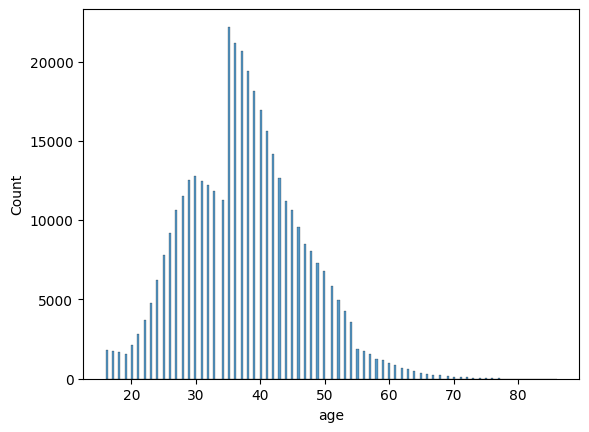

In [8]:
sns.histplot(data=open_athletes, x="age")

In [23]:
print(f'The mean age for the athletes')

print(open_athletes[["gender", "age"]].groupby("gender").mean())

The mean age for the athletes
              age
gender           
F       37.166037
M       37.772613


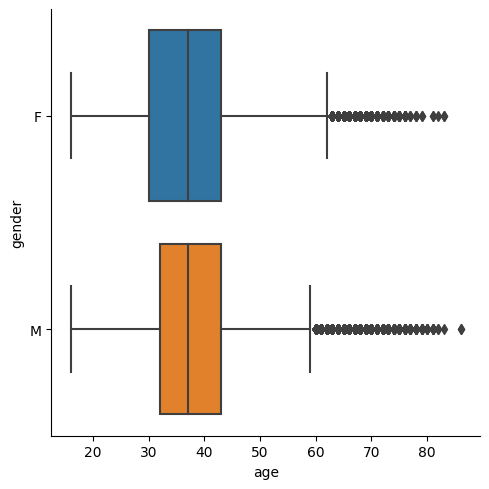

In [21]:
sns.catplot(data=open_athletes, x="age", y="gender", kind="box")

This was an unexpected results. Assumed the athletes competting would be shifted left to the younger age. Could be the higher cost of entry or another factor.

Additionally impressive there are athletes over 60 an even 80 years old 

### Athletes Height

List of information regarding the athletes height

In [19]:
print(f'The mean height for the athletes')

print(open_athletes[["gender", "height"]].groupby("gender").mean())

The mean height for the athletes
          height
gender          
F       1.640285
M       1.800544


Looking at the distrubution of the athletes height

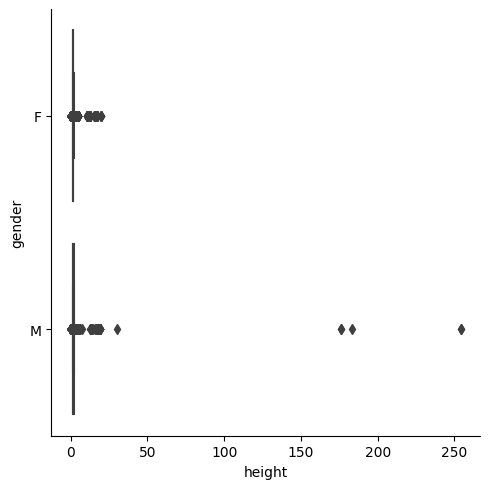

In [20]:
sns.catplot(data=open_athletes, x="height", y="gender", kind="box")

# cleaning outliers, will use later
# sns.catplot(data=open_athletes, x="height", y="gender", kind="box", showfliers= False)

Outliers in the male athletes appear higher then expected. If the height is in meters these athletes would be over 150 meters.

Additional cleaning will be required.

In [38]:
open_athletes[open_athletes["height"] > 3]

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
345,960685,Jen Kendell,Jen,Kendell,NaN,F,pukie.png,AU,Australia,4,116,CrossFit Maitland,45,4.06,62.00,346,2469,0,Women (45-49)
375,464470,Elaine van Zyl,Elaine,van Zyl,NaN,F,ed355-P464470_4-184.jpg,ZA,South Africa,4,9353,CrossFit Nelspruit,45,16.70,65.00,376,2713,0,Women (45-49)
477,994837,Elisa Cornish,Elisa,Cornish,NaN,F,pukie.png,AU,Australia,4,2189,CrossFit Rush Hour Ryde,46,4.44,68.00,478,3287,0,Women (45-49)
560,1195095,Tracey Curran,Tracey,Curran,NaN,F,170a2-P1195095_1-184.jpg,AU,Australia,4,13369,CrossFit Cool Town,48,4.14,60.00,561,3716,0,Women (45-49)
1865,1252943,Anneli Rydén,Anneli,Rydén,NaN,F,pukie.png,SE,Sweden,4,17869,CrossFit 162 West,46,4.17,64.00,1866,10554,0,Women (45-49)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392065,304821,Sean Krepps,Sean,Krepps,NaN,M,pukie.png,CA,Canada,3,1918,CrossFit Nanaimo,49,4.44,74.84,328,2221,1,Men (45-49)
392662,949653,Russell Hawkes,Russell,Hawkes,NaN,M,pukie.png,GB,United Kingdom,3,4235,CrossFit Colchester,48,4.32,89.36,924,4705,1,Men (45-49)
392730,1756690,Aaron Bairstow,Aaron,Bairstow,NaN,M,b3a40-P1756690_1-184.jpg,US,United States,3,0,NaN,48,12.95,92.99,993,4910,1,Men (45-49)
392985,1738402,Claude Bulté,Claude,Bulté,NaN,M,pukie.png,NL,Netherlands,3,0,NaN,45,4.52,86.00,1248,5679,1,Men (45-49)


### Athletes Weight

Investigation in the the athletes weight

In [41]:
print(f'The mean weight for the athletes')

print(open_athletes[["gender", "weight"]].groupby("gender").mean())

The mean weight for the athletes
           weight
gender           
F       63.922423
M       84.969751


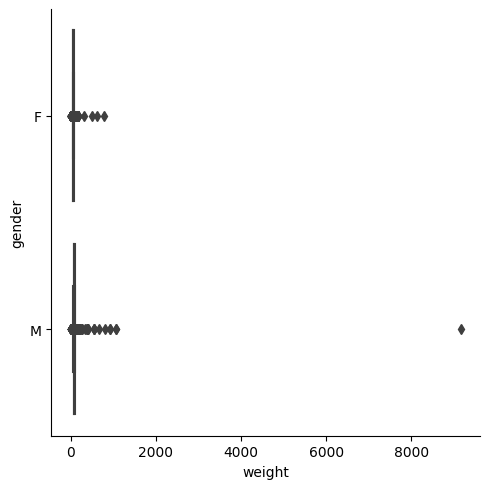

In [40]:
sns.catplot(data=open_athletes, x="weight", y="gender", kind="box")